In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
from matplotlib import pyplot


%matplotlib inline

In [2]:
activation = 'relu'
batch_size = 128
neurons_number = 128
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, name='dense_layer_2', activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, name='dense_layer_3', activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, name='dense_layer_4', activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               256       
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 49,921
Trainable params: 49,921
Non-trainable params: 0
_________________________________________________________________


In [4]:
X_train = np.linspace(0, 0.8, num=10000)
Y_train = X_train

In [5]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 3.0027e-04 - val_mse: 3.0027e-04
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4440e-05 - mse: 2.4440e-05 - val_loss: 3.3937e-05 - val_mse: 3.3937e-05
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss:

In [6]:
X_test = np.linspace(0, 0.8, num=333)
Y_test = X_test

test_loss, test_acc = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 4ms/step - loss: 1.5346e-06 - mse: 1.5346e-06


In [7]:
to_predict = np.linspace(0, 1.0, 150)
predict = model.predict(to_predict).reshape((150,))
predictions = pd.DataFrame({'X_test': to_predict, 'Y_test': predict}, columns=['X_test', 'Y_test'])

training = pd.DataFrame({'X_test': X_train, 'Y_test': Y_train}, columns=['X_test', 'Y_test'])

<AxesSubplot:xlabel='X_test', ylabel='Y_test'>

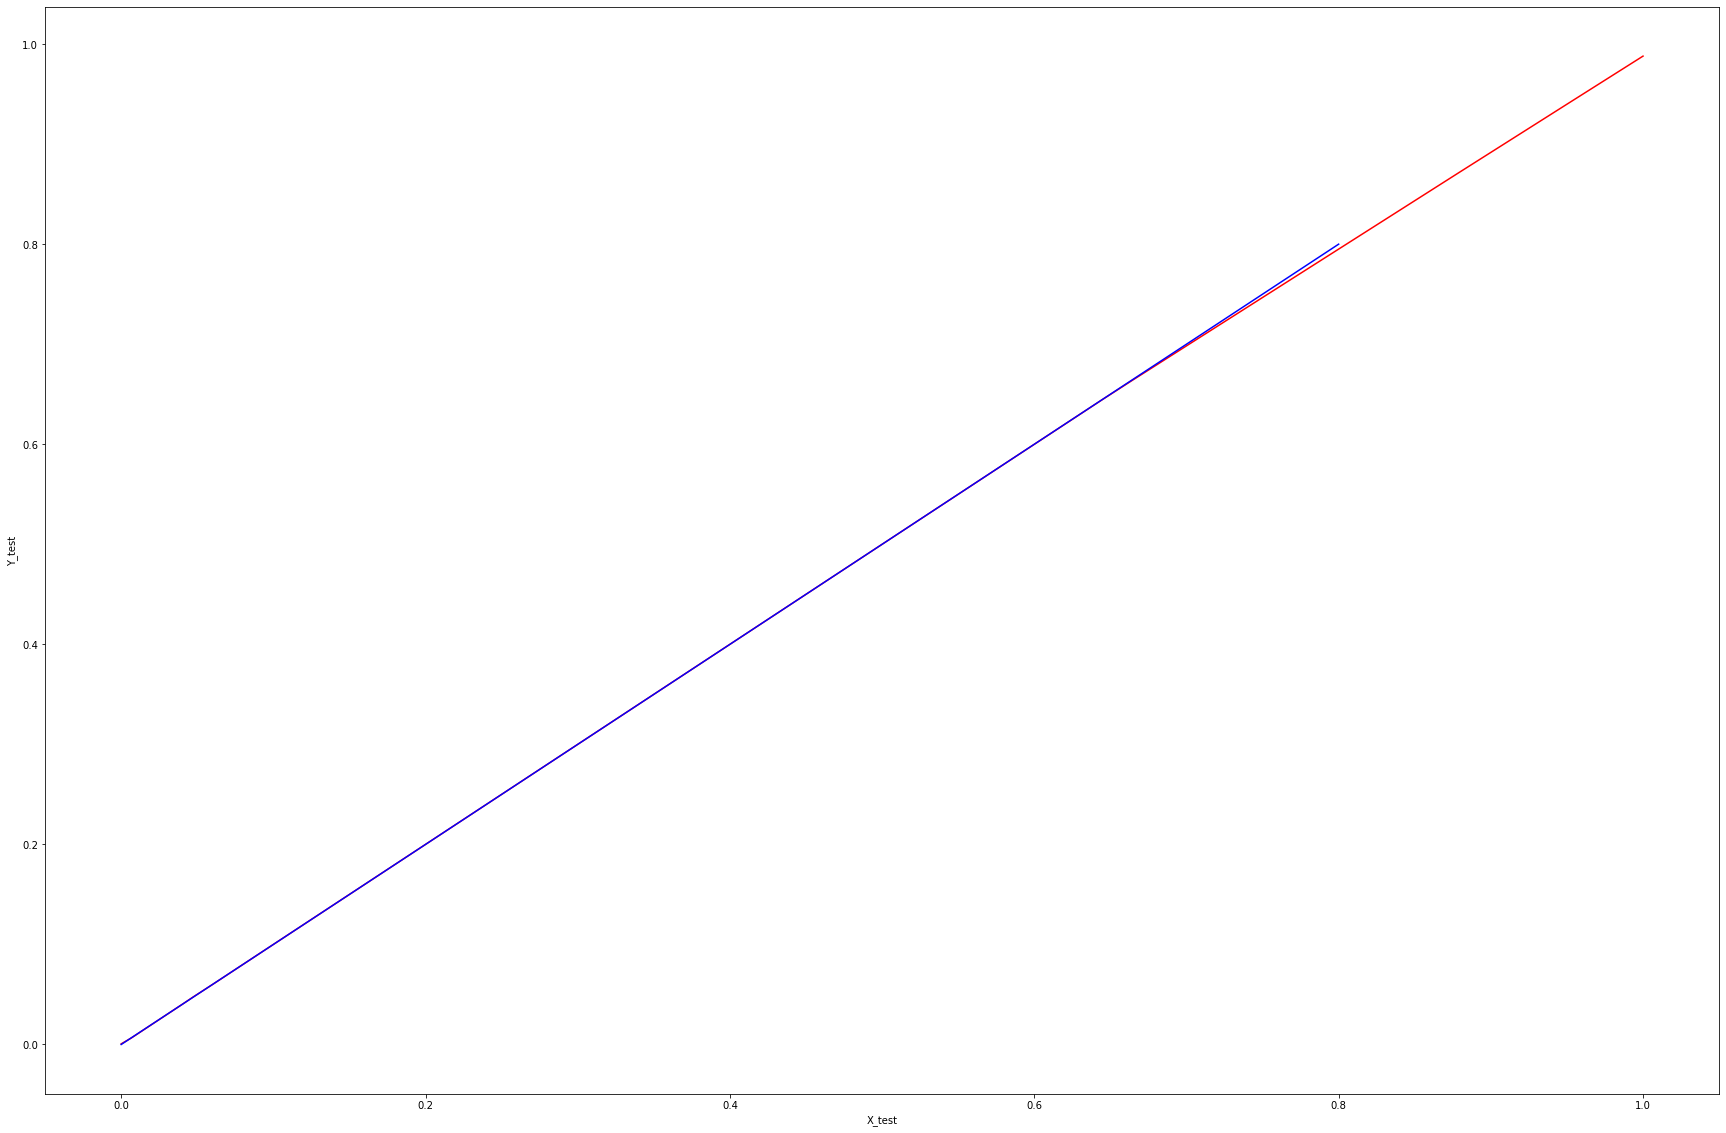

In [8]:
dims = (30, 20)
fig, ax = pyplot.subplots(figsize=dims)

sns.lineplot(data=predictions, x="X_test", y="Y_test" ,color="red")
sns.lineplot(data=training, x="X_test", y="Y_test" ,color="blue")